In [1]:
from __future__ import division
from __future__ import print_function
from sklearn.decomposition import PCA
from time import time
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from numpy import cumsum
from pca import pca_X
from pandas import DataFrame
% matplotlib inline

In [2]:
X, use = pca_X()

In [3]:
my_pca = PCA(n_components=0.99)

In [4]:
my_pca.fit(X)

PCA(copy=True, n_components=0.99, whiten=False)

Analyse PCA results by looking at principal components with highest explained variance

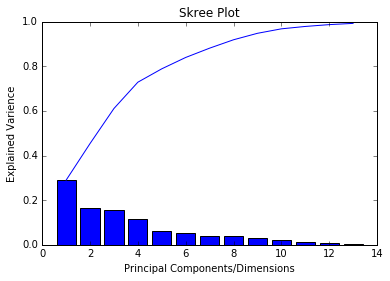

In [6]:
exp_var = my_pca.explained_variance_ratio_
plt.bar([i + 1 for i in range(len(exp_var))], exp_var, 0.8, align='center')
plt.plot([i + 1 for i in range(len(exp_var))], cumsum(exp_var))
plt.title('Skree Plot')
plt.xlabel('Principal Components/Dimensions')
plt.ylabel('Explained Varience')

In [16]:
comp = my_pca.components_

In [17]:
df = DataFrame(data=comp, columns=use.columns).T

In [18]:
prin_comp = 0
top = 5
sort_df = df.reindex(df[prin_comp].abs().sort_values(ascending=False).index)
clipped_df = sort_df.head(n=top)[[prin_comp]]
clipped_df

,0
name,
MCC t_HR_peak_1_kJpg,-0.307620
LOI Final,0.283480
tensile epsilon_break_%,-0.280049
tensile epsilon_max_%,-0.277178
ConeCal MARHE_kW_m2,-0.262711


In [19]:
names = clipped_df.index.tolist()

In [20]:
df_plot = use[names]

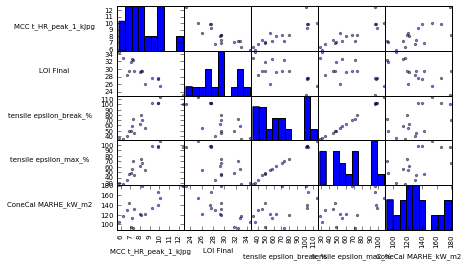

In [21]:
Axes = scatter_matrix(df_plot)#, diagonal='kde')
n = len(df_plot.columns)
for x in range(n):
    for y in range(n):
        # to get the axis of subplots
        ax = Axes[x, y]
        # to make x axis name vertical  
#         ax.xaxis.label.set_rotation(90)
        # to make y axis name horizontal 
        ax.yaxis.label.set_rotation(0)
        # to make sure y axis names are outside the plot area
        ax.yaxis.labelpad = 50

size = 7
[plt.setp(item.yaxis.get_majorticklabels(), 'size', size) for item in Axes.ravel()]
[plt.setp(item.xaxis.get_majorticklabels(), 'size', size) for item in Axes.ravel()]
[plt.setp(item.xaxis.get_label(), 'size', size) for item in Axes.ravel()]
[plt.setp(item.yaxis.get_label(), 'size', size) for item in Axes.ravel()]

plt.show()